# Topic Modelling
In this notebook we create a topic model for the text and also per article. The topic models are created as word clouds for easy visualization but tables are also possible.

First let us import the necessary libraries

Then load the text and create a pandas dataframe.

### Imports

In [2]:
# packages to store and manipulate data
import pandas as pd
# plotting packages
import matplotlib.pyplot as plt

import spacy
from tqdm import tqdm as tq
from random import shuffle
from gensim import corpora
from gensim.models.ldamodel import LdaModel

from numpy.random import randint
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
with open("data/grs-002_1984_76__218_d.txt","r") as fin:
    input_text = fin.readlines()
df = pd.DataFrame(input_text, columns=["text"])

## Entire text
This is topic modelling on the level of the entire text.

### WordCloud
In this type of topic modelling, we don't do much by hand but can display the topics in a nice "word cloud".

But first, once more, we decide on the number of topics:

In [5]:
N_TOPICS = 1

In [6]:
#nlp = spacy.load('en_core_web_sm')
nlp = spacy.load('de_core_news_sm')

def tokenize(x, nlp):
    # lemmatize and lowercase without stopwords, punctuation and numbers
    return [w.lemma_.lower() for w in nlp(x) 
            if not w.is_stop and not w.is_punct and not w.is_digit and len(w) > 2]

# split into paragraphs
doc_clean = []
for doc in tq(df['text']):
    # split by paragraph
    for paragraph in doc.split("\n\n"):
        doc_clean.append(tokenize(paragraph, nlp))

# randomize document order
shuffle(doc_clean)

# creating the term dictionary
dictionary = corpora.Dictionary(doc_clean)
# filter extremes, drop all words appearing in less than 10 paragraphs and all words appearing in at least every third paragraph
# dictionary.filter_extremes(no_below=10, no_above=0.33, keep_n=1000)

# creating the document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# train LDA with 10 topics and print
lda = LdaModel(doc_term_matrix, num_topics=N_TOPICS,
               id2word = dictionary, passes=3)
lda.show_topics(formatted=True)

100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


[(0,
  '0.014*"ausweis" + 0.012*"datum" + 0.010*"arbeitnehmer" + 0.010*"sulzer" + 0.009*"isler" + 0.009*"wirth" + 0.009*"winterthur" + 0.008*"betriebskommission" + 0.007*"elektronisch" + 0.007*"schulung"')]

With the computations done, let us look at the nice word clouds :)

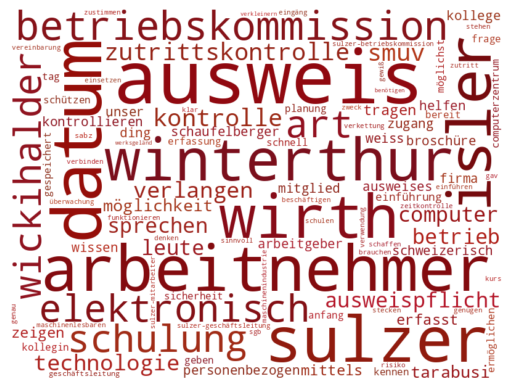

In [7]:
###
# LDA Word Clouds
###
#https://github.com/elliottash/nlp_lss_2023/blob/master/notebooks/03_topic_models.ipynb

# make directory if not exists to save the word cloud images in it.
from os import mkdir
try:
    mkdir('lda')
except:
    pass

# make word clouds for the topics
for i,weights in lda.show_topics(num_topics=N_TOPICS,
                                 num_words=100,
                                 formatted=False):

    maincol = randint(0,360)
    def colorfunc(word=None, font_size=None,
                  position=None, orientation=None,
                  font_path=None, random_state=None):
        color = randint(maincol-10, maincol+10)
        if color < 0:
            color = 360 + color
        return "hsl(%d, %d%%, %d%%)" % (color,randint(65, 75)+font_size / 7, randint(35, 45)-font_size / 10)


    wordcloud = WordCloud(background_color="white",
                          ranks_only=True,
                          max_font_size=120,
                          color_func=colorfunc,
                          height=600,width=800).generate_from_frequencies(dict(weights))

    plt.clf()
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()